# GTC ML Project 1 - Data Cleaning & Preprocessing Challenge

**Objective:** Build a robust data preprocessing pipeline for a hotel booking cancellation prediction model.
Business Problem: The revenue team has identified that last-minute booking cancellations significantly
impact profitability. Your task is not to build the final model, but to prepare the raw data for it. The quality
of your data cleaning will directly determine the model's future success.

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
plt.style.use("https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-light.mplstyle")

In [2]:
from google.colab import files
uploaded = files.upload()

Saving hotel_bookings.csv to hotel_bookings.csv


In [3]:
df = pd.read_csv('hotel_bookings.csv')

## Phase 1 - Exploratory Data Analysis (EDA) & Data Quality Report

The following section covers the first phases of the project:
1. Dataset overview
2. Missing values analysis
3. Outlier detection
4. Documentation of main data quality issues

### Dataset Overview

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [5]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [6]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


- the data has 119390 rows and 32 columns.
- 12 categorical columns, the rest numerical.
- data quality issue: date columns are split into year/month/day in columns (arrival_date_year, arrival_date_month, arrival_date_day_of_month).
- redundunt columns: arrival_date_week_number can be drived from arrival_date_year, arrival_date_month, arrival_date_day_of_month.

### Missing Values Analysis

In [7]:
df.isnull().sum()

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


<Axes: >

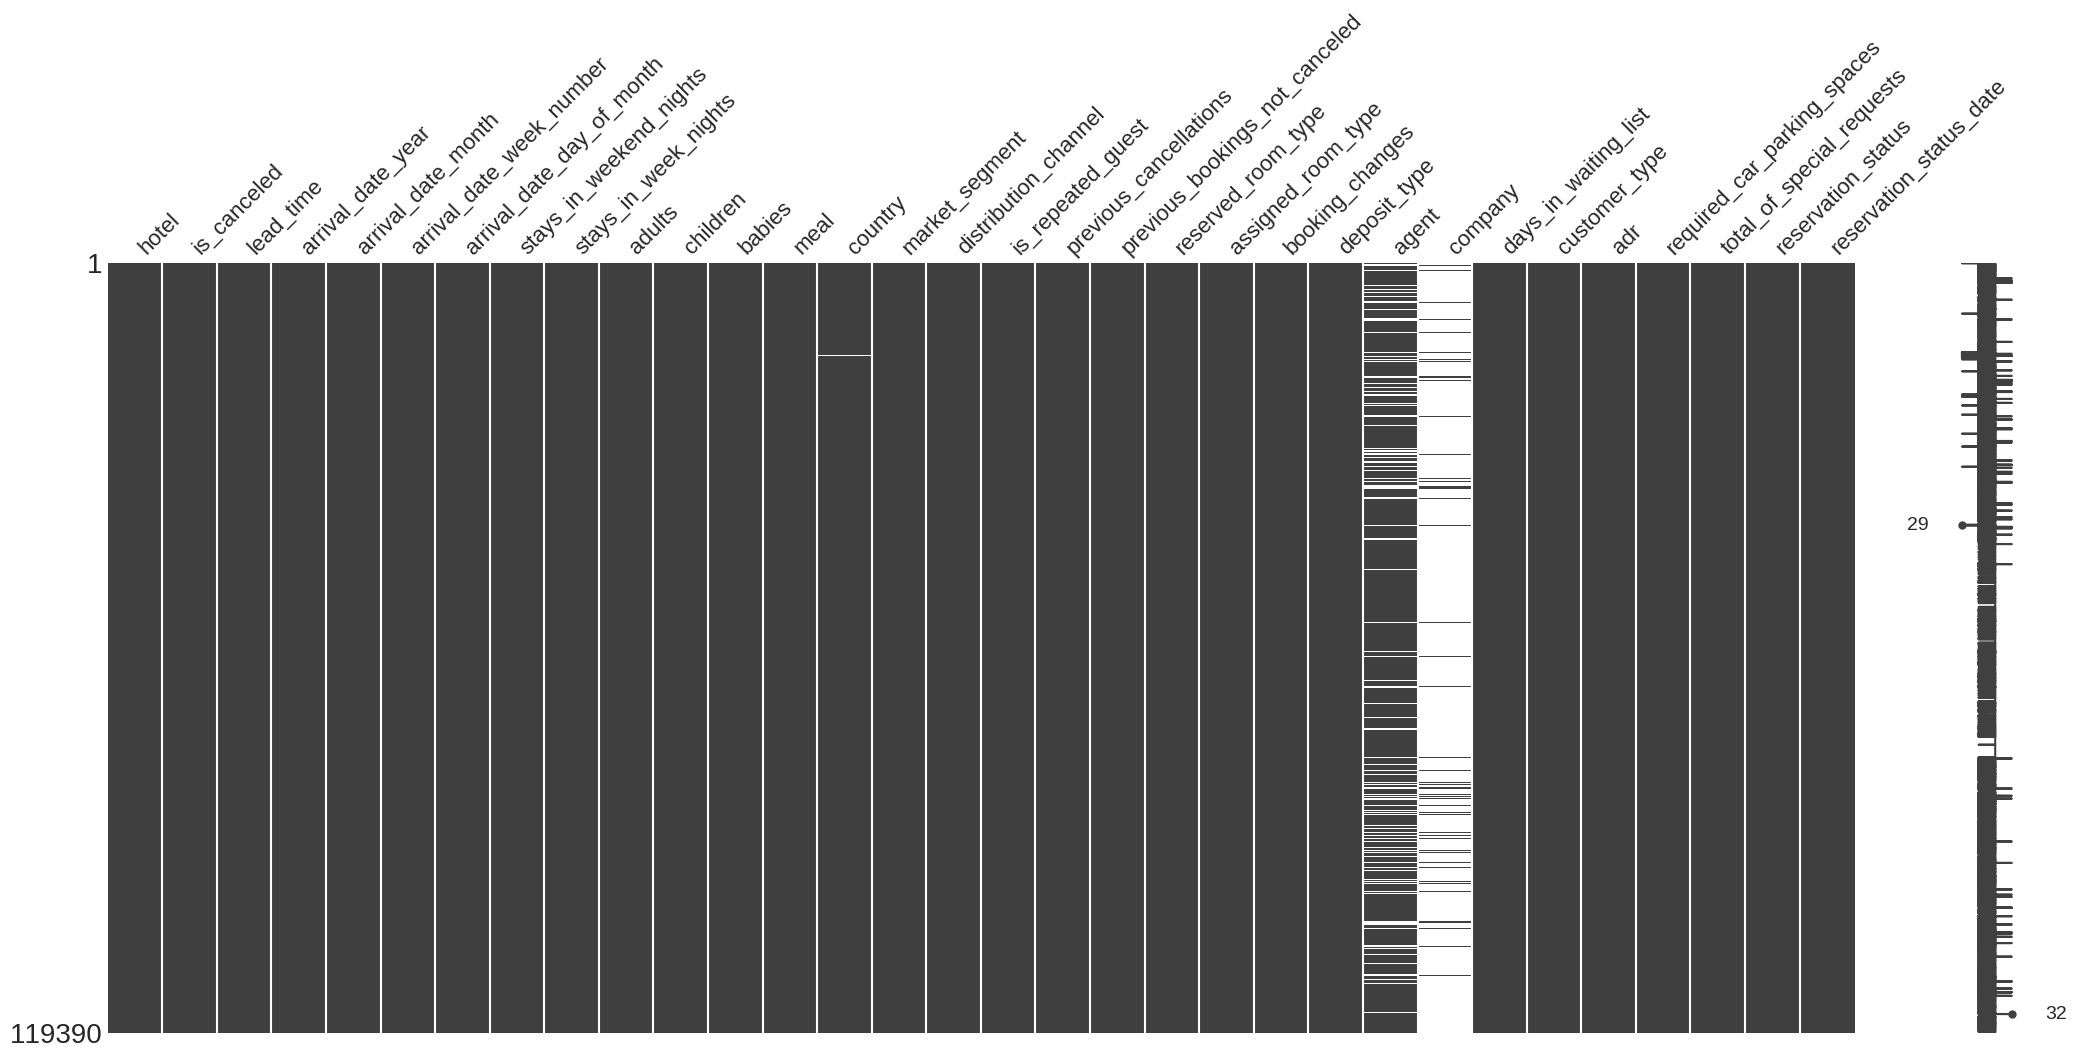

In [9]:
msno.matrix(df)

<Axes: >

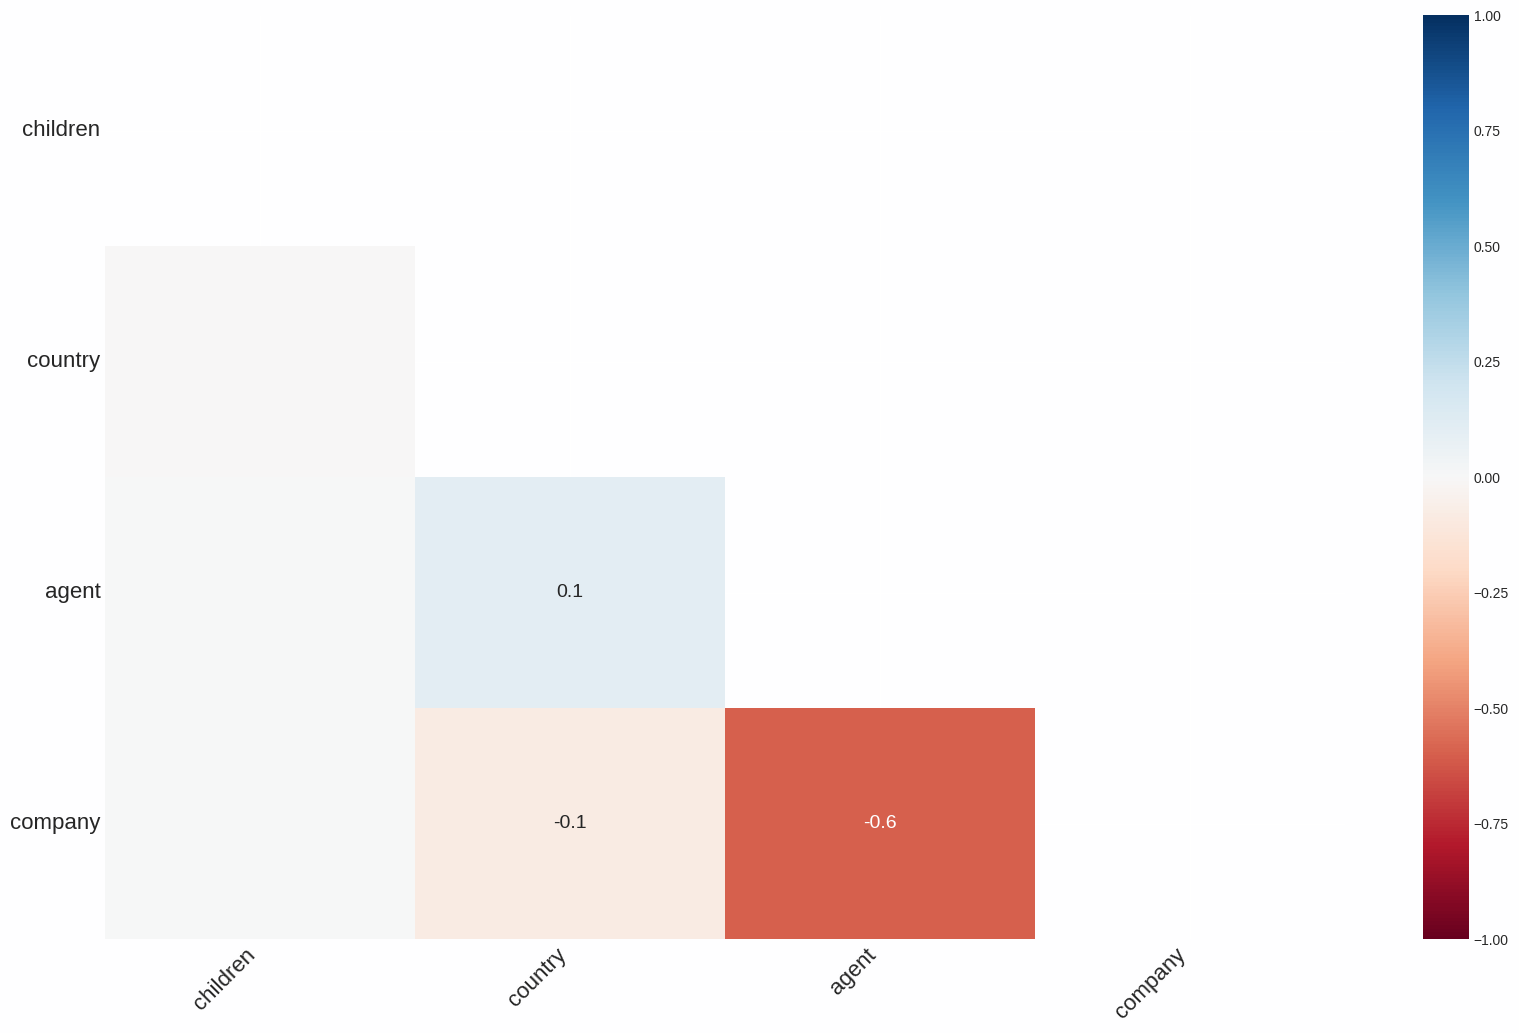

In [10]:
msno.heatmap(df)

In [11]:
df.nunique()

,0
hotel,2
is_canceled,2
lead_time,479
arrival_date_year,3
arrival_date_month,12
arrival_date_week_number,53
arrival_date_day_of_month,31
stays_in_weekend_nights,17
stays_in_week_nights,35
adults,14



- from the 32 columns we have 3 columns with missing values: country, agent,   and company.
- agent and company are negativily relating in terms of missing values.
- the data has only two hotels in it.
- the data doesn't have a unique identifier by default.

### Detecting Outliers

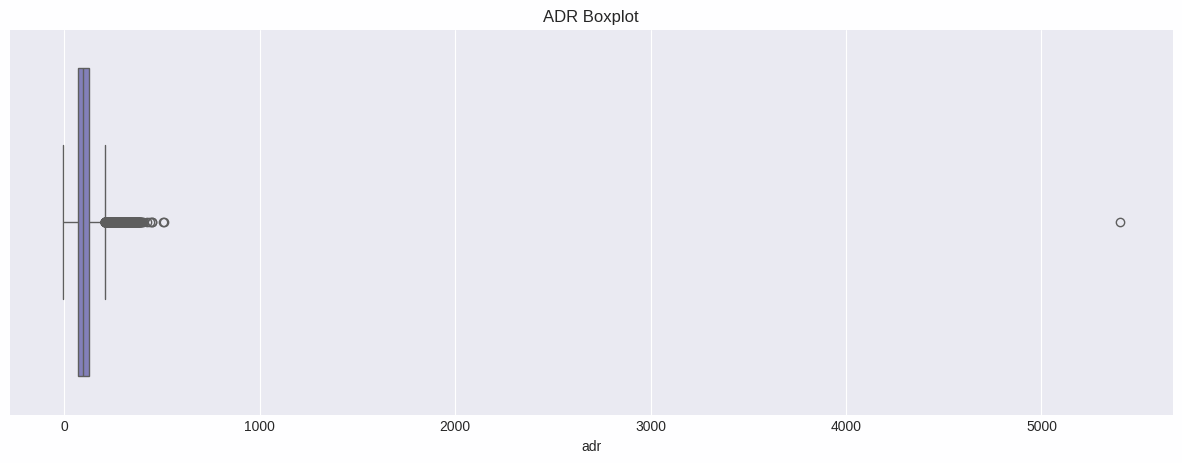

In [12]:
plt.figure(figsize=(15,5))
sns.boxplot(x=df['adr'])
plt.title("ADR Boxplot")
plt.show()

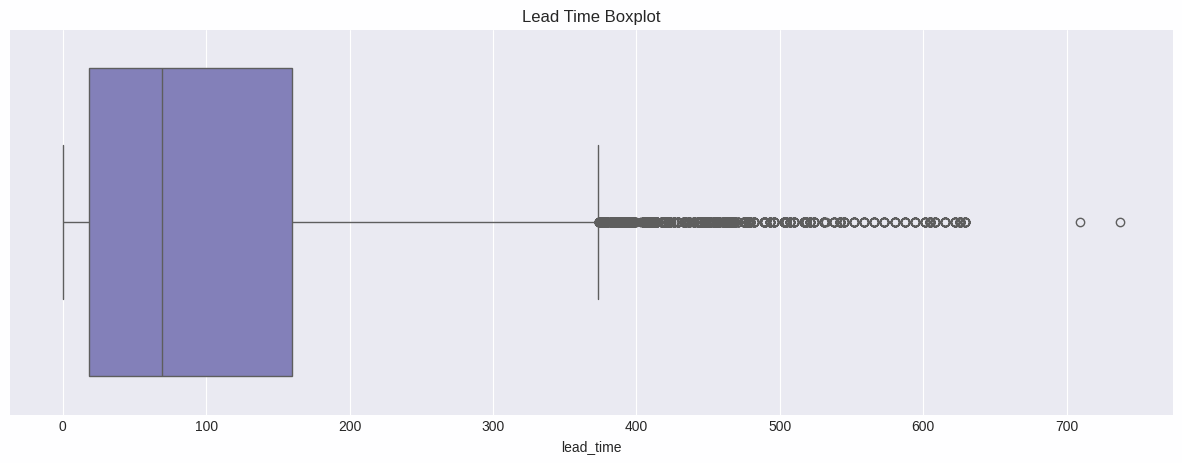

In [13]:
plt.figure(figsize=(15,5))
sns.boxplot(x=df['lead_time'])
plt.title("Lead Time Boxplot")
plt.show()

each of `adr` and `load_time` has a huge number of outliers.

### Summrize Data Quality Issues

1. **Missing Values**
   - `agent` and `company` have a large proportion of missing data.
   - Other columns: minimal missingness.

2. **Date Columns**
   - `arrival_date_year`, `arrival_date_month`, and `arrival_date_day_of_month` should be merged and thier data type should be date not object.
   - `arrival_date_week_number` can be removed.

3. **Outliers**
   - `adr` has extreme outliers.
   - `lead_time` distribution is highly skewed.

4. **Next Steps**
   - Decide on handling missing values.
   - Clean and restructure date columns.
   - Handle/remove outliers if necessary.

## Phase 2 - Data Cleaning (The Core of the Project)

In this phase, we address the data quality issues identified in Phase 1:
1. Handle missing values
2. Remove duplicates
3. Handle outliers
4. Fix data types

### Handle Missing Values

In [21]:
# company and agent will be filled with 0
df["company"]= df["company"].fillna(0)
df["agent"] = df["agent"].fillna(0)

# country can be filled with the mode and "unkown" category.
df["country"] = df["country"].fillna(df["country"].mode()[0])

# childern has a small missing number values so it can be filled with the median.
df["children"] = df["children"].fillna(df["children"].median())

In [22]:
df.isnull().sum()

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


### Removing Duplicates

In [23]:
df.drop_duplicates(inplace=True)

In [25]:
df.shape

(87377, 32)

### Handling outliers

Capping prevents extreme values from dominating the model while keeping the records.

In [28]:
df['adr'] = np.where(df['adr'] > 1000, 1000, df['adr'])

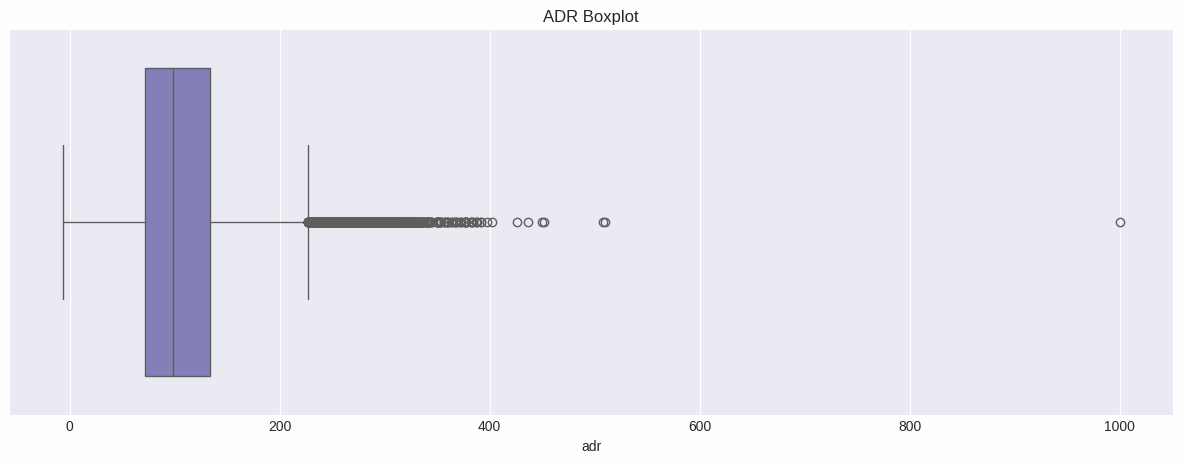

In [29]:
plt.figure(figsize=(15,5))
sns.boxplot(x=df['adr'])
plt.title("ADR Boxplot")
plt.show()

### Data Type Conversion

In [33]:
# createing new arriva_date column  with a datetime type
df['arrival_date'] = pd.to_datetime(df['arrival_date_year'].astype(str) + '-' + df['arrival_date_month'].astype(str) + '-' + df['arrival_date_day_of_month'].astype(str), errors='coerce')

In [32]:
df["arrival_date"]

,arrival_date
0,2015-07-01
1,2015-07-01
2,2015-07-01
3,2015-07-01
4,2015-07-01
...,...
119385,2017-08-30
119386,2017-08-31
119387,2017-08-31
119388,2017-08-31


In [34]:
# remove the columns we merged into arrival_date
df.drop(columns=['arrival_date_year','arrival_date_month','arrival_date_day_of_month','arrival_date_week_number'],inplace=True)

In [37]:
df.dtypes

,0
hotel,object
is_canceled,int64
lead_time,int64
stays_in_weekend_nights,int64
stays_in_week_nights,int64
adults,int64
children,float64
babies,int64
meal,object
country,object


### Summary of Data Cleaning
- Replaced missing values in `company` and `agent` with 0.
- Imputed missing `country` values with the mode.
- Filled missing `children` values with the median.
- Removed X duplicate rows.
- Capped `adr` at 1000 to handle extreme outliers.
- Converted date columns into a single datetime.
- Ensured categorical columns use the `category` data type.
